In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/luminar data/heart.csv")

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.isna().sum()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       161
           1       0.84      0.91      0.87       147

    accuracy                           0.87       308
   macro avg       0.87      0.88      0.87       308
weighted avg       0.88      0.87      0.87       308



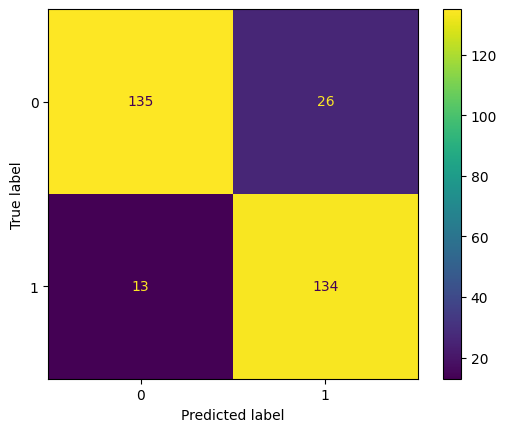

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

#hyper parameter tuning





In [ ]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[3,5,7,9],
        "weights":["uniform","distance"],
        "algorithm":["auto","ball_tree","kd_tree","brute"]}
clf=GridSearchCV(knn,params,cv=5,scoring="accuracy")
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="auto")
knn1.fit(X_train,y_train)
y_pred_new=knn1.predict(X_test)

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

